In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('bestsellers_with_categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.shape

(550, 7)

In [7]:
len(df.Name.unique())

351

In [8]:
len(df.Author.unique())

248

In [9]:
len(df.Year.unique())

11

In [10]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0.5, 1.0, 'User Rating Scale')

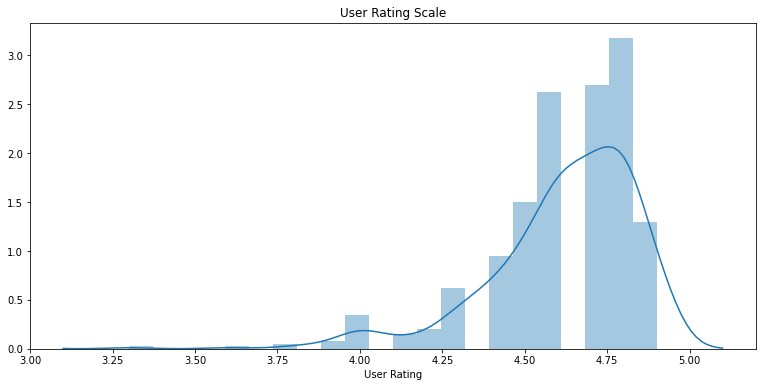

In [11]:
# распределение рейтингов
ax = sns.distplot(df['User Rating'])
ax.set_title('User Rating Scale')

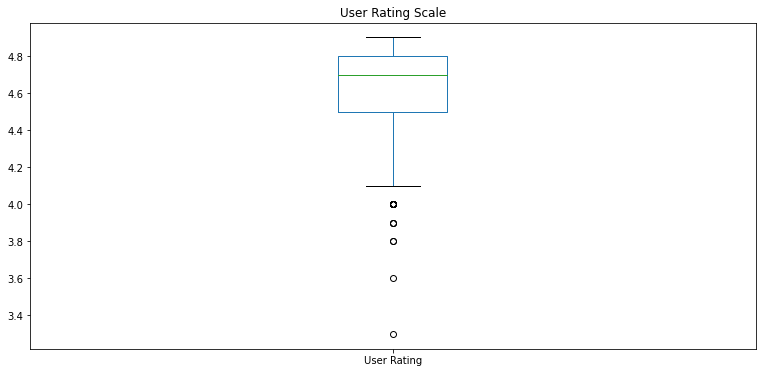

In [12]:
# очень хорошо подходит для поиска выбросов!
df['User Rating'].plot(kind='box',
                   title='User Rating Scale')

In [13]:
# в целом рейтинг книг очень высокий, 75% книг имеют рейтинг выше 4,5, присутствуют выбросы в сторону более низких рейтингов 
# (за счет произведений с низким рейтингом в 2012 и 2015 гг.). 

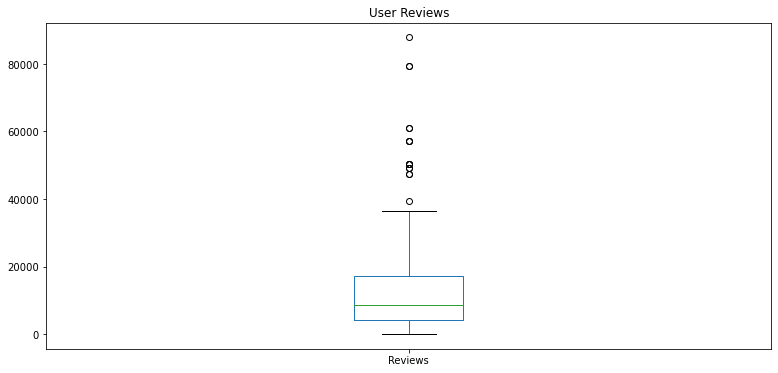

In [14]:
df['Reviews'].plot(kind='box',
                   title='User Reviews')

In [15]:
# число отзывов довольно сильно варьируется, при этом в 2015-2016 и 2019 гг. наблюдался существенный рост
# судя по динамике в разрезе книг рост мог быть вызван не только выходом новой книги, но также интересом к книгам ранее находящимся
# в рейтинге топовых, возможно в связи с их экранизацией или переизданием

In [16]:
# динамика цен по годам
price_by_year = df[['Year']+['Price']].groupby('Year').mean()
price_by_year

,Price
Year,
2009,15.40
2010,13.48
2011,15.10
2012,15.30
2013,14.60
2014,14.64
2015,10.42
2016,13.18
2017,11.38


Text(0, 0.5, 'Price')

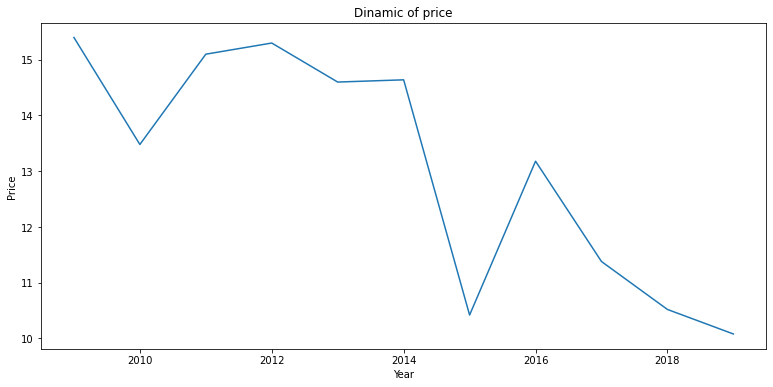

In [17]:
ax = price_by_year.Price.plot(title='Dinamic of price')
ax.set_xlabel('Year')
ax.set_ylabel('Price')

In [18]:
# динамика цен волатильна с общей тенденцией к снижению, что могло быть вызвано удешевлением книг за счет увеличения
# продаж книг в мягких обложках и ростом популярности электронных книг в последние годы

Text(0.5, 1.0, 'Correlation between Price and User Rating')

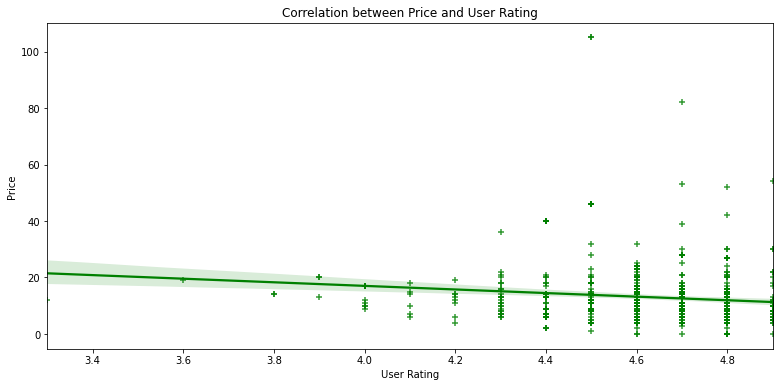

In [19]:
# зависимость цены и рейтинга
ax = sns.regplot(data=df, x='User Rating', y='Price', color='green', marker='+')
ax.set_title('Correlation between Price and User Rating')

In [20]:
# зависимость не выявлена

Text(0.5, 1.0, 'Correlation between User Rating and Reviews')

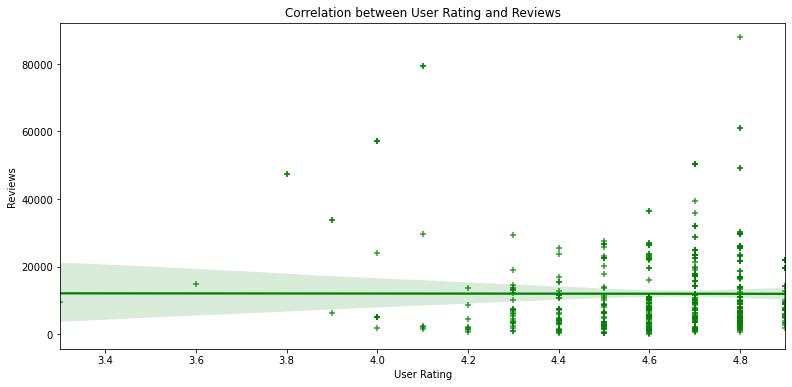

In [21]:
# зависимость числа отзывов читателей и рейтинга
ax = sns.regplot(data=df, x='User Rating', y='Reviews', color='green', marker='+')
ax.set_title('Correlation between User Rating and Reviews')

In [22]:
# в целом книги с высоким рейтингом имеют также больше отзывов от читателей

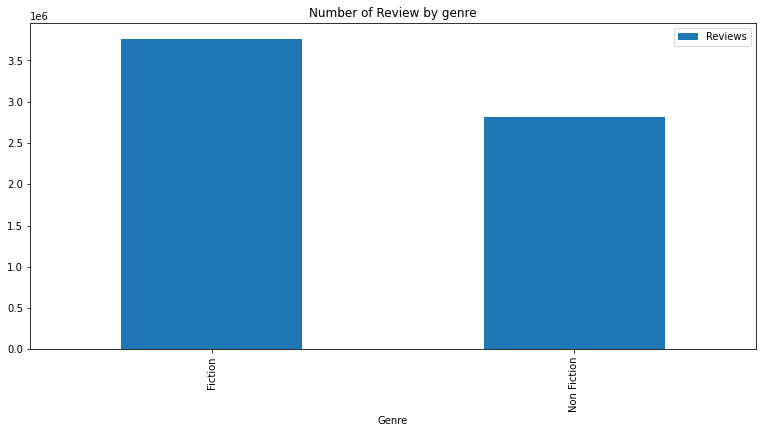

In [23]:
# число отзывов читателей в разрезе жанров
reviews_by_genre = df[['Reviews', 'Genre']].groupby('Genre').sum()
reviews_by_genre.loc[['Fiction', 'Non Fiction']].plot(kind='bar', 
                                                                  title='Number of Review by genre')

In [24]:
# несмотря на то, что число романов жанра Non fiction превосходит романы в жанре Fiction последние более популярны у читателей,
# о чем свидетельствует большее число отзывов

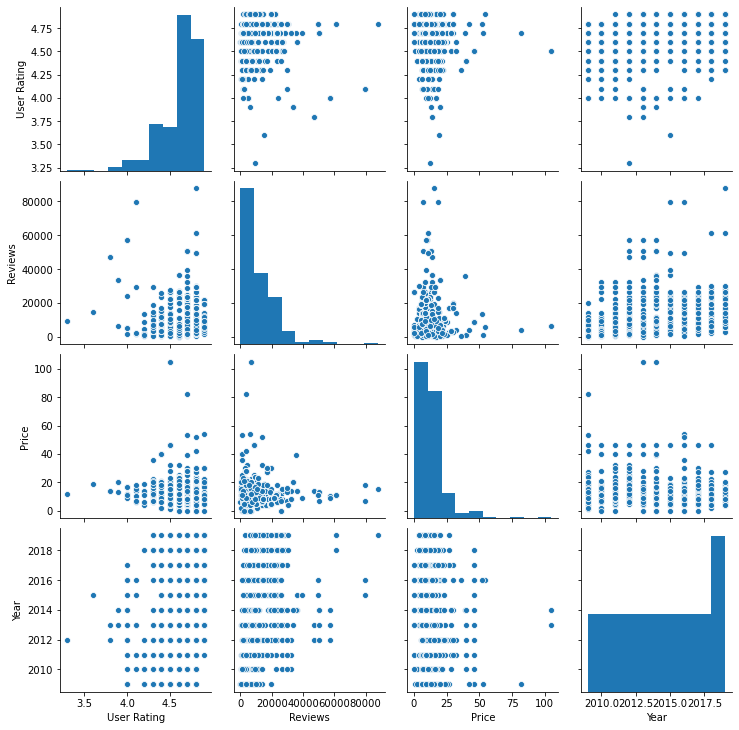

In [25]:
sns.pairplot(df[['User Rating', 'Reviews', 'Price', 'Year']])

In [26]:
# выведем данные о топ-10 книг по числу отзывов читателей
top_book_df = df.groupby(['Name', 'Author'])[['Reviews']].sum()\
    .sort_values('Reviews', ascending=False).head(10)
    
top_book_df

,,Reviews
Name,Author,
The Fault in Our Stars,John Green,201928
"Oh, the Places You'll Go!",Dr. Seuss,174672
Gone Girl,Gillian Flynn,171813
The Girl on the Train,Paula Hawkins,158892
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",Laura Hillenbrand,148365
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz,139848
The Very Hungry Caterpillar,Eric Carle,136822
To Kill a Mockingbird,Harper Lee,131170
The 5 Love Languages: The Secret to Love that Lasts,Gary Chapman,127770


In [27]:
top_book_df.style.bar(align='mid')

,,Reviews
Name,Author,
The Fault in Our Stars,John Green,201928
"Oh, the Places You'll Go!",Dr. Seuss,174672
Gone Girl,Gillian Flynn,171813
The Girl on the Train,Paula Hawkins,158892
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",Laura Hillenbrand,148365
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book),Don Miguel Ruiz,139848
The Very Hungry Caterpillar,Eric Carle,136822
To Kill a Mockingbird,Harper Lee,131170
The 5 Love Languages: The Secret to Love that Lasts,Gary Chapman,127770
